Packages

In [1]:
include("ws.jl"); # Personal symbolic math package https://github.com/Vindrue/Jellyfish

  Activating project at `~/Projects/Jellyfish/Jellyfish/Jellyfish.jl`


In [2]:
using Plots
using LsqFit
using Statistics

Data

In [3]:
g = 9.82
h = 1
ε = 1e-12; # epsilon to avoid 0/0

In [4]:
ΔT_1 = [24.7, 25.5, 26.4, 26.9, 27.5, 27.8, 28.2] .- 24.7
ΔT_2 = [24.7, 25.5, 26.4, 27.1, 27.5, 27.9, 28.2] .- 24.7
ΔT_3 = [24.2, 25.1, 26.0, 26.6, 27.1, 27.4, 27.8] .- 24.2
M = [0, 20, 40, 60, 80, 100, 120] .|> float;

Models

In [5]:
function adiabatΔT(M, params)
    α = params[1]

    return α.*M
end

function lossΔT(M, params)
    α = params[1]
    β = params[2]

    return (α.*M)./(β.*M.+1)
end;

Averaging out the ΔT's

In [6]:
ΔT = []; ΔT_Δ = [];
for i in 1:length(ΔT_1)
    col = [ΔT_1[i], ΔT_2[i], ΔT_3[i]]
    
    push!(ΔT, mean(col))

    push!(ΔT_Δ, sem(std(col), 3))
end

Fitting

In [7]:
adiabatfit = curve_fit(adiabatΔT, M, ΔT, [1.0]     )
lossfit    = curve_fit(lossΔT   , M, ΔT, [1.0, 1.0]);

In [8]:
adiabat_params   = adiabatfit.param
adiabat_params_Δ = LsqFit.stderror(adiabatfit)
loss_params      = lossfit.param
loss_params_Δ    = LsqFit.stderror(lossfit);

Plotting

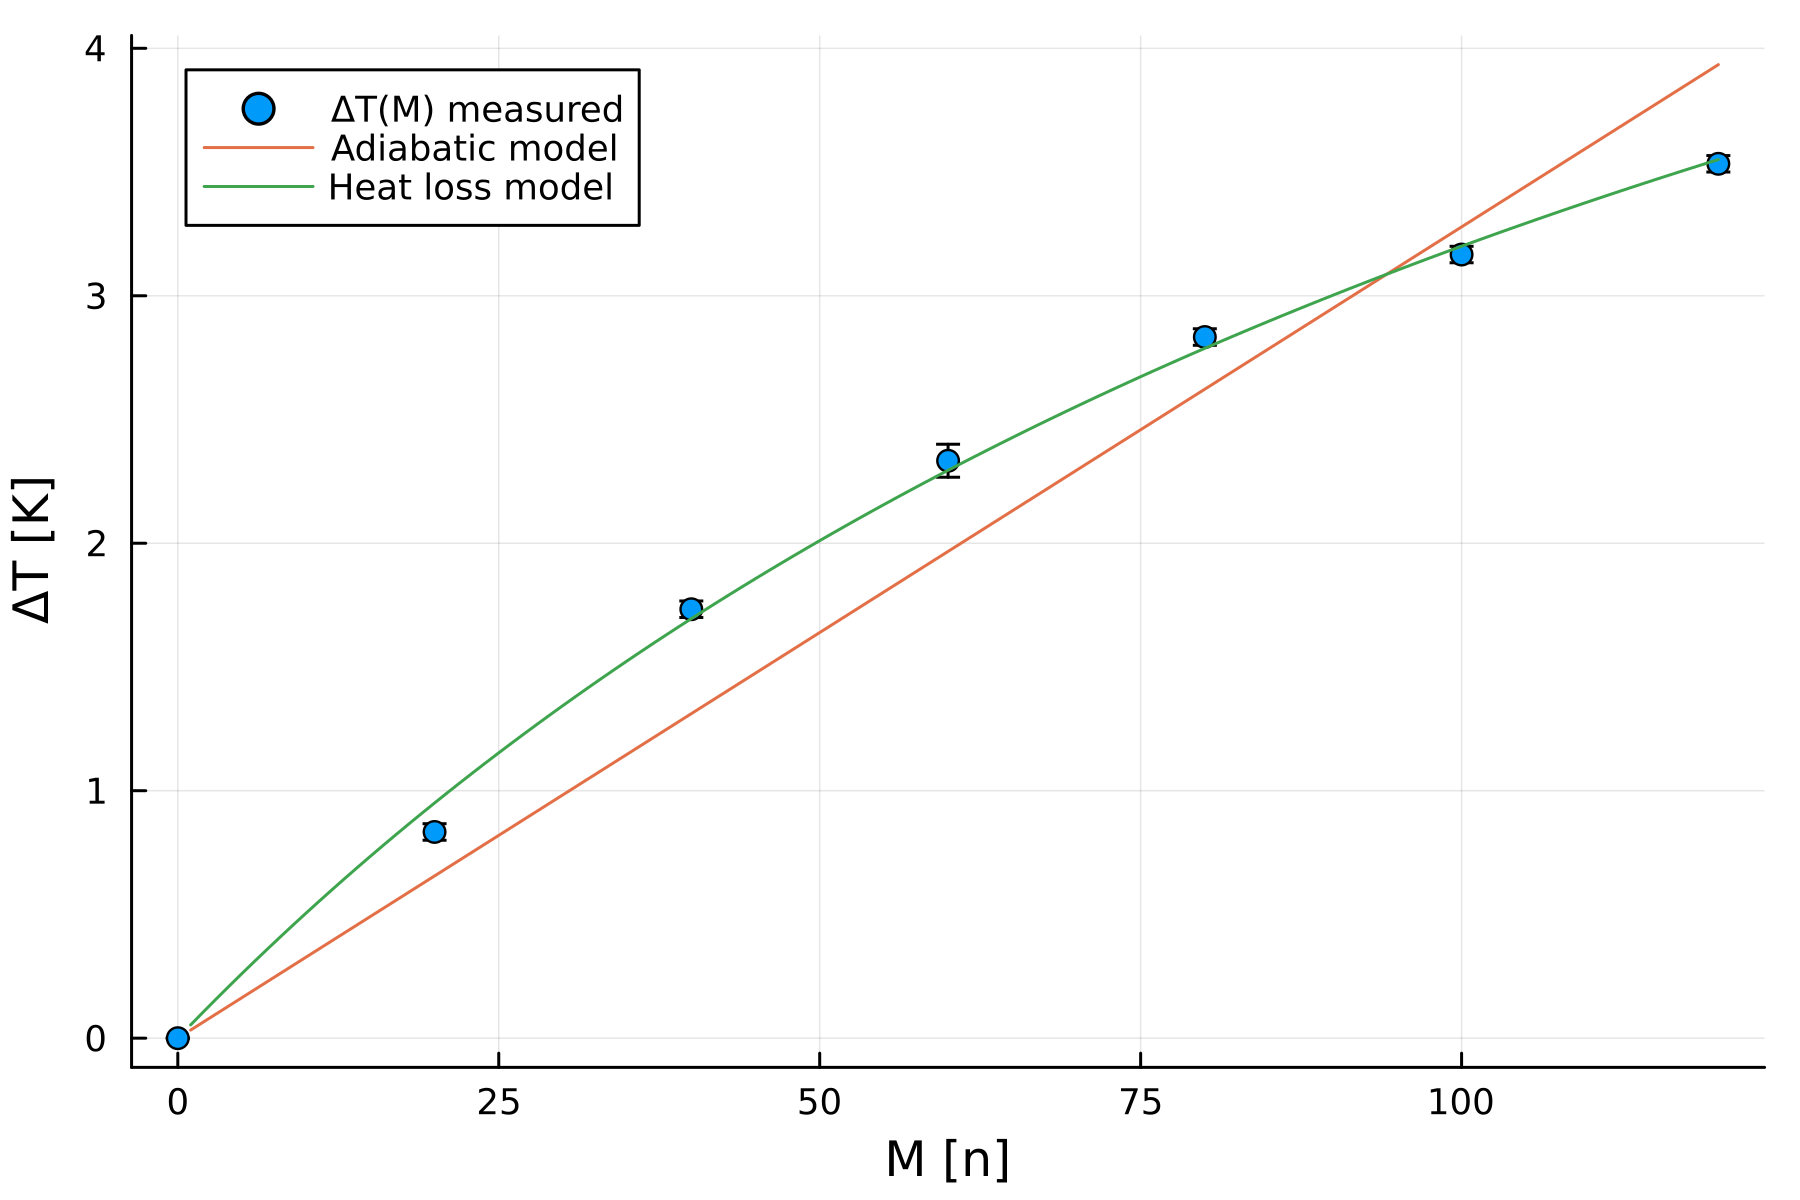

In [9]:
scatter(M, ΔT, yerr=ΔT_Δ, label="ΔT(M) measured", xlabel="M [n]", ylabel="ΔT [K]", dpi=300)
plot!(adiabatΔT(1:maximum(M), adiabat_params), label="Adiabatic model")
plot!(lossΔT(1:maximum(M), loss_params), label="Heat loss model")

In [10]:
savefig("plot.png")

"/home/vin/Projects/Jellyfish/Jellyfish/Jellyfish.jl/plot.png"

In [11]:
println("Adiabatic model reduced χ²: " * string(chisq(ΔT.+ε, adiabatΔT(M.+ε, adiabat_params), ΔT_Δ.+ε)))
println("Heat loss model reduced χ²:  " * string(chisq(ΔT.+ε,    lossΔT(M.+ε, loss_params), ΔT_Δ.+ε)*2))

Adiabatic model reduced χ²: 14.824356987396643
Heat loss model reduced χ²:  1.1633896571543068


In [12]:
adiabat_params

1-element Vector{Float64}:
 0.03278388282341153

In [13]:
adiabat_params_Δ

1-element Vector{Float64}:
 0.0016030437098488437

In [14]:
loss_params

2-element Vector{Float64}:
 0.05407840861219603
 0.006898136521437285

In [15]:
loss_params_Δ

2-element Vector{Float64}:
 0.0026053518385327217
 0.0008635777950593953

In [17]:
(g*h)/adiabat_params[1]

299.5374298064344

In [22]:
(g*h)/loss_params[1]

181.58818375038769

In [20]:
@sym _α
properr(((g*h)/_α), err=adiabat_params_Δ[1], vals=adiabat_params[1])

14.6465748215948

In [21]:
@sym _α
properr(((g*h)/_α), err=loss_params_Δ[1], vals=loss_params[1])

8.74842881902398